In [55]:
#kütüphaneleri import ettik
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('housing_price_dataset.csv')

In [ ]:
data.head()

In [ ]:
data.info()

In [ ]:
data.describe()

**VERİ ÖN İŞLEME VE EDA**


In [ ]:
data= data.drop(data[data['Price'] < 0].index)
data.describe()

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(data, hue="Price")

In [8]:
labelen = LabelEncoder()
data['Neighborhood'] = labelen.fit_transform(data['Neighborhood'])

In [ ]:
data

<Axes: >

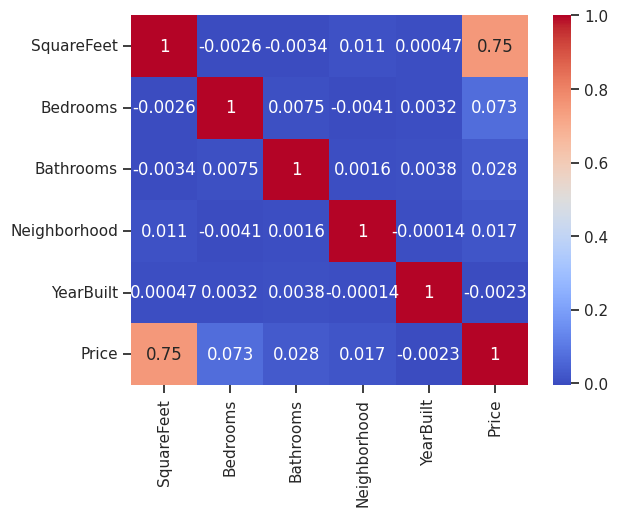

In [10]:
data_corr = data.corr()
sns.heatmap(data_corr, annot=True , cmap = 'coolwarm')

In [11]:
X = data.iloc[:, :5]
X

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt
0,2126,4,1,0,1969
1,2459,3,2,0,1980
2,1860,2,1,1,1970
3,2294,2,1,2,1996
4,2130,5,2,1,2001
...,...,...,...,...,...
49995,1282,5,3,0,1975
49996,2854,2,2,1,1988
49997,2979,5,3,1,1962
49998,2596,5,2,0,1984


In [59]:
y = data['Price']
y

0        215355.283618
1        195014.221626
2        306891.012076
3        206786.787153
4        272436.239065
             ...      
49995    100080.865895
49996    374507.656727
49997    384110.555590
49998    380512.685957
49999    221618.583218
Name: Price, Length: 49978, dtype: float64

In [14]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)

**MODEL SEÇİMİ**

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LİNEER REGRESYON

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

RANDOM FOREST

In [42]:
forest = RandomForestRegressor()
forest.fit(X_train ,y_train)

RandomForestRegressor()

In [43]:
forest.score(X_test , y_test)

0.5221531423202566

HİPERPARAMETRE OPTİMİZASYONU

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_features': ['auto', 'sqrt']
}

forest = RandomForestRegressor()
random_search = RandomizedSearchCV(forest, param_distributions=param_dist,
                                   n_iter=20)
random_search.fit(X_train, y_train)
print("En İyi Parametre:", random_search.best_params_)
best_model = random_search.best_estimator_


In [ ]:
best_model.score(X_test,y_test)

POLİNOMAL REGRESYON

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(X_train, y_train)
polyreg.score(X_test,y_test)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
k = 5
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)
knn_reg.score(X_test,y_test)

OPTİMİZASYON

In [45]:
liste = []
for i in range(1,100):
  knn_reg = KNeighborsRegressor(n_neighbors=i)
  knn_reg.fit(X_train, y_train)
  a = knn_reg.score(X_test,y_test)
  liste.append(a)

In [57]:
max_value = np.max(liste)
max_index = liste.index(max_value)

print("En yüksek skor:", max_value)
print("En yüksek skorun indeksi:", max_index + 1)


En yüksek skor: 0.5683261382846883
En yüksek skorun indeksi: 99


In [58]:
#OPTİMİZE EDİLMİŞ DEĞERLE MODELİ TEKRAR ÇALIŞTIRMA
k = 99
knn_reg = KNeighborsRegressor(n_neighbors=k)
knn_reg.fit(X_train, y_train)
knn_reg.score(X_test,y_test)

0.5683261382846883

Ortalama Mutlak Hata (MAE): 39978.79977491523
Ortalama Kare Hata (MSE): 2500228635.8851066
Kök Ortalama Kare Hata (RMSE): 50002.28630657909
R-kare (R^2): 0.5683261382846883


In [65]:
y_pred = model.predict(X_test)

print("LİNEER")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Ortalama Mutlak Hata (MAE):", mae)
print("Ortalama Kare Hata (MSE):", mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)
print("R-kare (R^2):", r2)

y_pred = best_model.predict(X_test)

print("\nRANDOM FOREST")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Ortalama Mutlak Hata (MAE):", mae)
print("Ortalama Kare Hata (MSE):", mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)
print("R-kare (R^2):", r2)

y_pred = polyreg.predict(X_test)

print("\nPOLİNOMAL")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Ortalama Mutlak Hata (MAE):", mae)
print("Ortalama Kare Hata (MSE):", mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)
print("R-kare (R^2):", r2)
y_pred = knn_reg.predict(X_test)

print("\nKNN")
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Ortalama Mutlak Hata (MAE):", mae)
print("Ortalama Kare Hata (MSE):", mse)
print("Kök Ortalama Kare Hata (RMSE):", rmse)
print("R-kare (R^2):", r2)

LİNEER
Ortalama Mutlak Hata (MAE): 39495.14781153473
Ortalama Kare Hata (MSE): 2445148828.7345905
Kök Ortalama Kare Hata (RMSE): 49448.44617108399
R-kare (R^2): 0.5778358738000487

RANDOM FOREST
Ortalama Mutlak Hata (MAE): 42565.144248295604
Ortalama Kare Hata (MSE): 2845486029.346607
Kök Ortalama Kare Hata (RMSE): 53343.09729802542
R-kare (R^2): 0.5087161529488762

POLİNOMAL
Ortalama Mutlak Hata (MAE): 39504.39598137609
Ortalama Kare Hata (MSE): 2445702000.4046183
Kök Ortalama Kare Hata (RMSE): 49454.039272890725
R-kare (R^2): 0.577740366634198

KNN
Ortalama Mutlak Hata (MAE): 39978.79977491523
Ortalama Kare Hata (MSE): 2500228635.8851066
Kök Ortalama Kare Hata (RMSE): 50002.28630657909
R-kare (R^2): 0.5683261382846883
